In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import core
from data import read_data

# TEST_DATA_PATH = "labs/linear/resources/"
TEST_DATA_PATH = "resources/"

In [2]:
def evaluate_nrmse_score(dataset, W):
    X = np.array(dataset.X)
    Y = np.array(dataset.Y)
    sum = np.sum((Y - (X @ W)) ** 2) / Y.size

    y_diff = np.max(Y) - np.min(Y)
    return math.sqrt(sum) / y_diff

In [3]:
print("Compare Gradient descent and Generalized inverse")
for i in range(1, 8):
    print("Dataset #" + str(i))

    train, test = read_data(TEST_DATA_PATH + str(i) + ".txt")
    gd_W = core.gradient_descent(train)
    gd_score = evaluate_nrmse_score(test, gd_W)
    print("for gradient descent NRMSE: '" + str(gd_score) + "'")

    gi_W = core.generalized_inverse(train)
    gi_score = evaluate_nrmse_score(test, gi_W)
    print("for generalized inverse NRMSE: '" + str(gi_score) + "'")

Compare Gradient descent and Generalized inverse
Dataset #1
for gradient descent NRMSE: '0.009899416542133267'
for generalized inverse NRMSE: '31.301402244625297'
Dataset #2
for gradient descent NRMSE: '0.0248041316333596'
for generalized inverse NRMSE: '4.428838169955577'
Dataset #3
for gradient descent NRMSE: '0.5378004165342154'
for generalized inverse NRMSE: '0.00012920649455533617'
Dataset #4
for gradient descent NRMSE: '0.05413750513725576'
for generalized inverse NRMSE: '1.8834653458446493'
Dataset #5
for gradient descent NRMSE: '0.03180265141877565'
for generalized inverse NRMSE: '2.9813702173493954'
Dataset #6
for gradient descent NRMSE: '0.0013185133639810412'
for generalized inverse NRMSE: '13.914726174485159'
Dataset #7
for gradient descent NRMSE: '0.0008947051899259854'
for generalized inverse NRMSE: '9.87431734338889'


Graph for gradient descent train and testing


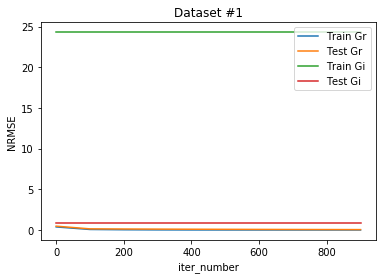

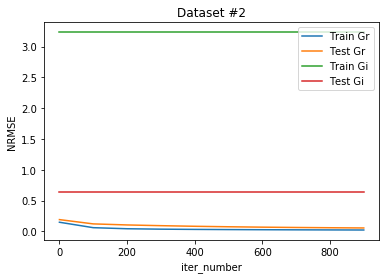

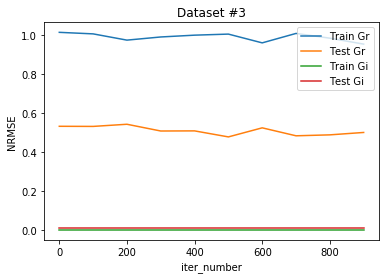

In [ ]:
print("Graph for gradient descent train and testing")
iter_range = range(0, 1000, 100)

for i in range(1, 8):
    train, test = read_data(TEST_DATA_PATH + str(i) + ".txt")
    train_scores = []
    test_scores = []    
   
    for iter_number in iter_range:
        curr_W = core.gradient_descent_steps(train, iter_number)
        train_scores.append(evaluate_nrmse_score(train, curr_W))

        curr_W = core.gradient_descent_steps(test, iter_number)
        test_scores.append(evaluate_nrmse_score(test, curr_W))

    gi_train = core.generalized_inverse(train)
    gi_test = core.generalized_inverse(test)

    gi_train_scores = [evaluate_nrmse_score(train, gi_train)] * len(train_scores)
    gi_test_scores = [evaluate_nrmse_score(test, gi_test)] * len(test_scores)

    plt.plot(iter_range, train_scores, iter_range, test_scores, iter_range, gi_train_scores, iter_range, gi_test_scores)
    plt.ylabel('NRMSE')
    plt.xlabel('iter_number')
    plt.title('Dataset #' + str(i))
    plt.legend(('Train Gr', 'Test Gr', 'Train Gi', 'Test Gi'), loc='upper right')
    plt.show()